# **🚢 Titanic Survival Analysis**

## **Project Overview**
This project analyzes the famous Titanic dataset (Kaggle) to explore the factors that affected passenger survival.  

The goal is to clean the data, perform exploratory data analysis (EDA), and extract meaningful insights about survival patterns.

## **Objectives**
- Understand passenger demographics and characteristics.  
- Identify key factors that influenced survival.  
- Provide data-driven insights that could explain survival outcomes.  


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('Titanic.csv')

#  **Data Summary**
The Dataset contains data about passengers on the RMS Titanic, which tragically sank on April 15, 1912 after hitting an iceberg.

# **Data Description**

| Column           | Description                                                                 | Dtype   |
|------------------|-----------------------------------------------------------------------------|---------|
| PassengerId            | Unique ID for each passenger                                     | int64   |
| Survived              | Passenger that Survived                          | int64   |
| Pclass      | Passenger Ticket class               | int64   |
| Name        | Passenger’s full name                                   | object  |
| Sex     | Gender (male/female)                               | object |
| Age         | Age in years                                                    | float64   |
| SibSp           | Number of siblings/spouses aboard the Titanic                             | int64  |
| Parch            | Number of parents/children aboard the Titanic                                           | int64  |
| Ticket        | Ticket number                            | object  |
| Fare     | Ticket price                                                  | float64  |
| Cabin        | Cabin number                                                | object  |
| Embarked       | Port of Embarkation	C =Cherbourg,Q =Queenstown,S =Southampton    | object  |

# **Exploring the Dataset**

In [35]:
df.shape # 891 Rows and 12 Columns

(891, 12)

In [36]:
print('-- DataFrame First 5 Rows --')
df.head()

-- DataFrame First 5 Rows --


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
print('-- DataFrame Last 5 Rows --')
df.tail()

-- DataFrame Last 5 Rows --


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
print("-- Data Missing Values --")
df.isnull().sum()

-- Data Missing Values --


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [41]:
print("-- DataSet Duplicated Values --")
df.duplicated().sum()

-- DataSet Duplicated Values --


np.int64(0)

# **Dataset Overview**
The dataset contains 891 rows and 12 columns. It contains data about passengers on the RMS Titanic, which tragically sank on April 15, 1912 after hitting an iceberg.

**Data types include:**

- int64: 5 columns
- float64: 2 columns
- object (categorical/text): 5 columns

**Missing values:** Present in several columns (Age, Cabin, Embarked).                                                           
**Duplicated Values:** There are no duplicated values.

#  **Handling Missing Values:**

In [42]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
df['Cabin'] = df['Cabin'].fillna('Unknown')

# **Handling Outliers:**

In [43]:
df['Age'] = df['Age'].round().astype("Int64")

In [44]:
df = df[df["Age"] != 0].copy()
df.reset_index(drop=True, inplace=True)

In [46]:
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [45]:
# Outliers: (Age, Fare)
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - 1.5 * IQR
UpperBound = Q3 + 1.5 * IQR
outliers = df[(df["Age"] < LowerBound) | (df["Age"] > UpperBound)]
print(outliers["Age"].sort_values())
# For Titanic: extreme ages (like 70, 74, 80) may actually be important
print('===================')

Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - 1.5 * IQR
UpperBound = Q3 + 1.5 * IQR
outliers = df[((df["Fare"] < LowerBound) | (df["Fare"] > UpperBound))]
print(outliers["Fare"].sort_values())
df = df[(df["Fare"] >= LowerBound) & (df["Fare"] <= UpperBound)].copy()
df.reset_index(drop=True, inplace=True)

78      1
172     1
164     1
183     1
305     1
       ..
672    70
96     71
493    71
850    74
630    80
Name: Age, Length: 65, dtype: Int64
151     66.6000
336     66.6000
369     69.3000
641     69.3000
201     69.5500
         ...   
341    263.0000
438    263.0000
258    512.3292
679    512.3292
737    512.3292
Name: Fare, Length: 116, dtype: float64


# **Data Visualization**

### **📊 Key Insights**
- **Gender:** Females had a much higher survival rate than males.

- **Class:** First-class passengers had higher chances of survival than third-class.  

- **Age:** Younger passengers (children) survived more often.  


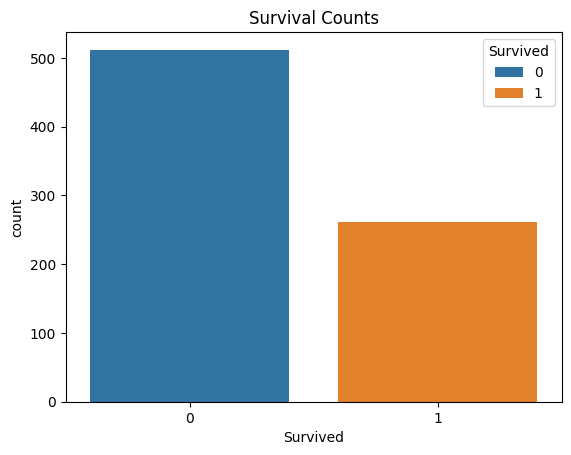

In [50]:
# Survival counts
sns.countplot(x = 'Survived', hue = 'Survived', data = df)
plt.title('Survival Counts')
plt.show()

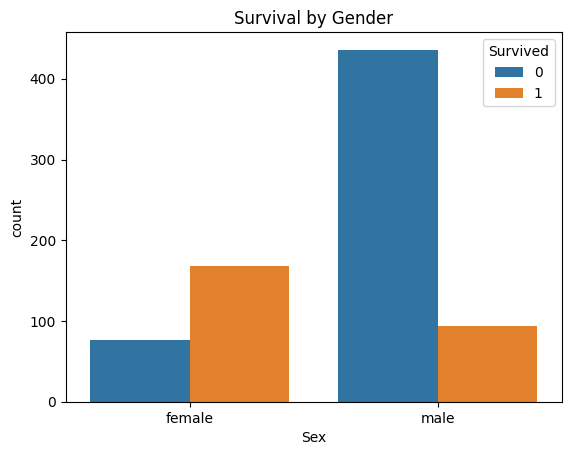

In [49]:
# Survival by gender
sns.countplot(x = 'Sex', hue = 'Survived', data = df)
plt.title('Survival by Gender')
plt.show()

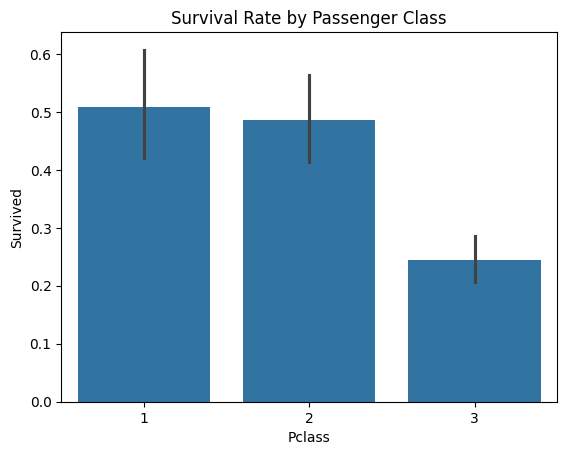

In [65]:
# Survival by Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

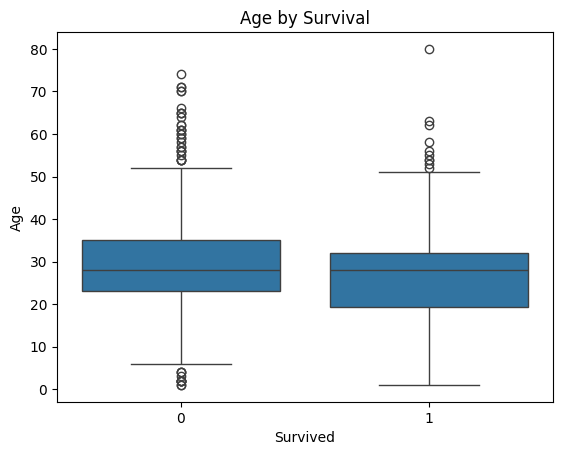

In [64]:
# Age by Survival
sns.boxplot(x = 'Survived', y = 'Age', data = df)
plt.title('Age by Survival')
plt.show()

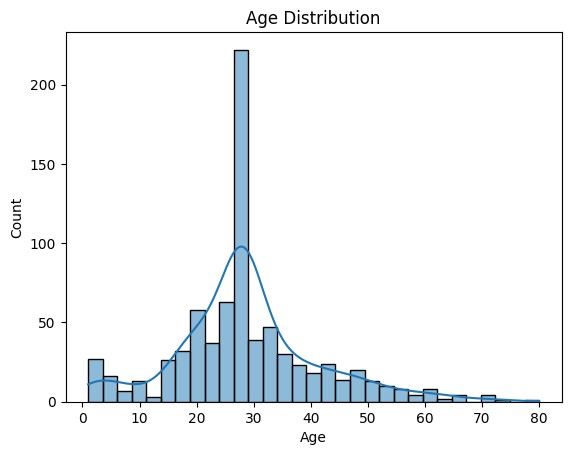

In [53]:
# Age distribution
sns.histplot(x = 'Age', data = df, kde=True)
plt.title('Age Distribution')
plt.show()

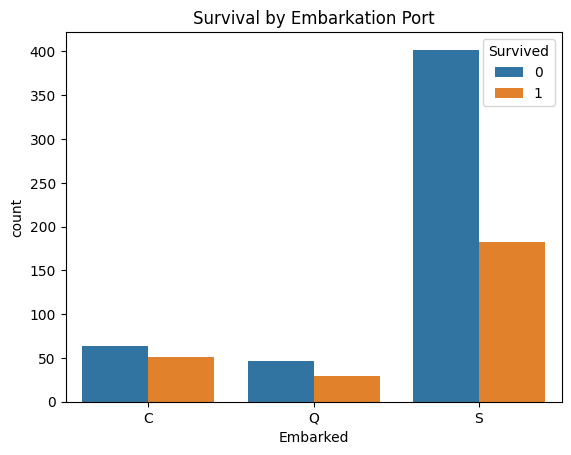

In [56]:
# Survival by Embarkation Port
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Port')
plt.show()

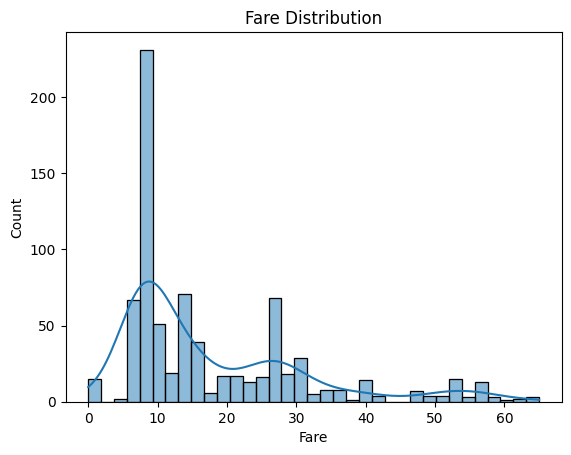

In [58]:
# Fare distribution
sns.histplot(df['Fare'], bins=35, kde=True)
plt.title('Fare Distribution')
plt.show()

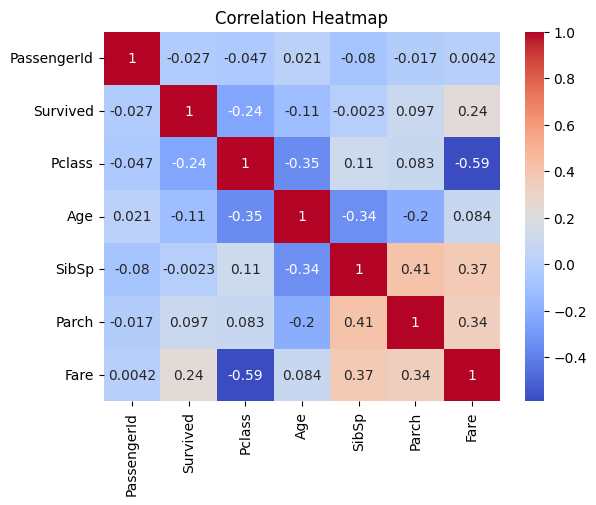

In [59]:
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **🧩 Feature Engineering Insights**
- **Family size:** Passengers with families had higher survival rates compared to those traveling alone.  

- **Age groups:** Children had a significantly higher survival rate than adults and seniors, reflecting the "women and children first" policy.  


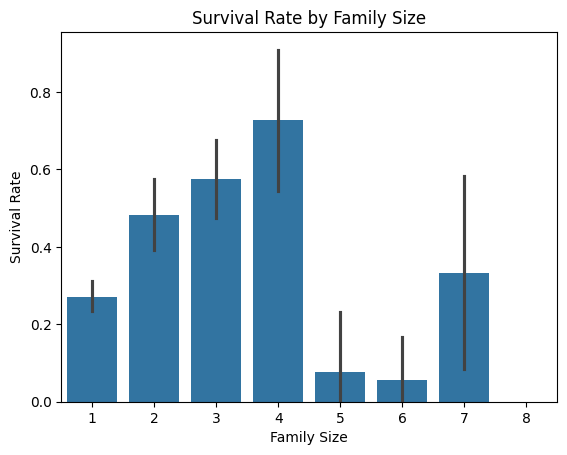

In [66]:
# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()


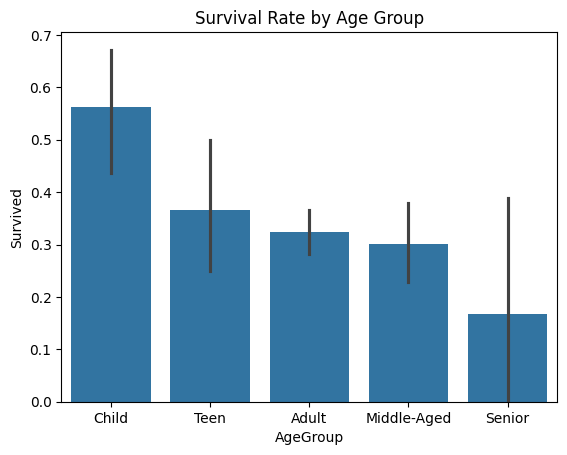

In [67]:
# Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,80],
                        labels=['Child','Teen','Adult','Middle-Aged','Senior'])

sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title("Survival Rate by Age Group")
plt.show()


# **📌 Conclusions**
- **Gender** was the most important factor in survival (74% females survived vs 19% males).

- **Passenger class** mattered: 1st class had much higher survival than 3rd class.  

- **Family size** played a role: passengers traveling with family had higher chances.

- **Children** had higher survival rates compared to adults.  
